In [1]:
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from torch import nn
import numpy as np
import torch
from scipy.spatial import distance
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sys import path as paths
import time
import os
import geatpy as ea

project_dir = 'D:/用户/桌面/homework/第二学期/6032/DL MOEA/code/Main/'
figures_dir = 'D:/用户/桌面/homework/第二学期/6032/DL MOEA/paper/figures/'  # figures存放的目录
paths.append(project_dir + 'Algorithms')

from GNN_Model import *

## Device Setting
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device = "cpu"

In [2]:
def createData8():
    """
    3D非线性
    """
    x1 = np.linspace(0.1, 0.9, 100)
    x2 = np.sin(x1)
    x3 = x1**2
    X = np.vstack([x1, x2, x3]).T  # 3D

    data = X[:100, :]
    data = np.delete(data, range(25, 75), axis=0)
    return data

In [3]:
# 训练
data = createData8()
Lb = np.zeros(data.shape[1])
Ub = np.ones(data.shape[1])
Field = np.vstack([Lb, Ub, np.zeros(data.shape[1])])

start = time.time()
data_set = data_preprocessing(data, Lb, Ub)
network_list = train_net(data_set, epochs=3000, hidden_dim=100*data.shape[1])
end = time.time()
print(end - start)

7.105858325958252


In [4]:
# 预测
total_predicts_data = generate_data(network_list, data_set, Lb, Ub, data.shape[0], NUM=50)
total_predicts_data = ea.boundfix('RI', total_predicts_data, Field)

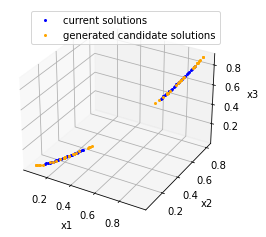

In [5]:
def draw(data, total_predicts_data):
    fig = plt.figure()
    if data.shape[1] == 2:
        plt.plot(data[:, 0], data[:, 1], 'o', markersize=2, color='blue', label='current solutions', )  # 绘制真实数据的图
        plt.plot(total_predicts_data[:, 0], total_predicts_data[:, 1], 'o', markersize=2, color='orange', label='generated candidate solutions')  # 绘制生成的数据的图
        plt.xlabel('x1')
        plt.ylabel('x2')
    elif data.shape[1] == 3:
        ax = fig.gca(projection='3d')
        ax.plot(data[:, 0], data[:, 1], data[:, 2], 'o', markersize=2, color='blue', label='current solutions', )  # 绘制真实数据的图
        ax.plot(total_predicts_data[:, 0], total_predicts_data[:, 1], total_predicts_data[:, 2], 'o', markersize=2, color='orange', label='generated candidate solutions')  # 绘制生成的数据的图
        ax.set_xlabel('x1')
        ax.set_ylabel('x2')
        ax.set_zlabel('x3')
    plt.legend()
    plt.savefig(figures_dir + '2D_non_linear_manifold_learning.pdf', dpi=100, bbox_inches='tight')
    plt.show()

# 绘制结果图
draw(data, total_predicts_data)